# Exploratory Data Analysis
Explore the Kaggle Housing data

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load the training data
df = pd.read_csv('./data/train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
# Data shape
df.shape

(1460, 81)

In [10]:
# List all columns with the data types, null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# Number of columns that are numeric
df.select_dtypes(include='number').shape

(1460, 38)

In [11]:
# Number of columns that are categorical. Assuming that all object columns are categorical, which seems to be the case
# based on the description of the data
df.select_dtypes(include='object').shape

(1460, 43)

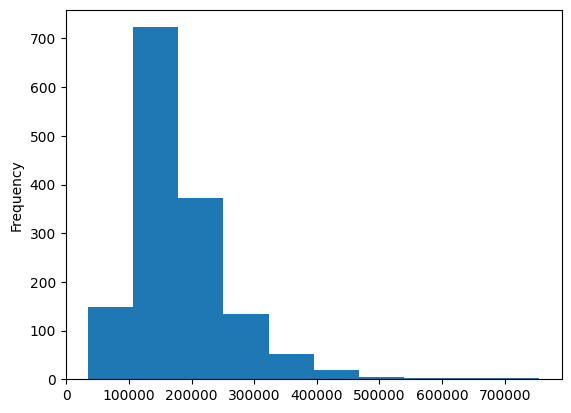

In [20]:
# Plot the distributions of the numeric columns
df['SalePrice'].plot(kind="hist")
plt.show()

In [27]:
# How are columns correlated
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
df.select_dtypes(include='number').dropna().corr(method=histogram_intersection)

Id  MSSubClass  LotFrontage     LotArea  OverallQual  \
Id                  1.0     61247.0      76965.0    814790.0       6943.0   
MSSubClass      61247.0         1.0      46047.0     62940.0       6964.0   
LotFrontage     76965.0     46047.0          1.0     79216.0       6964.0   
LotArea        814790.0     62940.0      79216.0         1.0       6964.0   
OverallQual      6943.0      6964.0       6964.0      6964.0          1.0   
OverallCond      6221.0      6234.0       6234.0      6234.0       5695.0   
YearBuilt      814790.0     62940.0      79216.0   2206005.0       6964.0   
YearRemodAdd   814790.0     62940.0      79216.0   2220980.0       6964.0   
MasVnrArea      99469.0     24556.0      32879.0    121615.0       3176.0   
BsmtFinSF1     335558.0     40084.0      52052.0    491446.0       4673.0   
BsmtFinSF2      40967.0      5861.0       8875.0     49985.0        704.0   
BsmtUnfSF      450160.0     56468.0      73291.0    666015.0       6562.0   
TotalBsmtSF    696496.0     61565.0      77634.0   1207446.0       6855.0   
1stFlrSF       741108.0     62940.0      79216.0   1315588.0       6964.0   
2ndFlrSF       273973.0     36560.0      34129.0    396003.0       3168.0   
LowQualFinSF     3889.0      1045.0       1122.0      5121.0        102.0   
GrLivArea      788451.0     62940.0      79216.0   1716712.0       6964.0   
BsmtFullBath      464.0       464.0        464.0       464.0        464.0   
BsmtHalfBath       62.0        62.0         62.0        62.0         62.0   
FullBath         1771.0      1772.0       1772.0      1772.0       1772.0   
HalfBath          428.0       428.0        428.0       428.0        428.0   
BedroomAbvGr     3208.0      3211.0       3211.0      3211.0       3206.0   
KitchenAbvGr     1169.0      1169.0       1169.0      1169.0       1169.0   
TotRmsAbvGrd     7351.0      7372.0       7372.0      7372.0       6517.0   
Fireplaces        677.0       677.0        677.0       677.0        677.0   
GarageYrBlt    814790.0     62940.0      79216.0   2212845.0       6964.0   
GarageCars       2105.0      2106.0       2106.0      2106.0       2106.0   
GarageArea     449699.0     62940.0      79216.0    563813.0       6964.0   
WoodDeckSF      96203.0     29008.0      37488.0    103816.0       3593.0   
OpenPorchSF     49440.0     25700.0      34593.0     51712.0       4261.0   
EnclosedPorch   22830.0      7812.0      10328.0     24488.0        872.0   
3SsnPorch        2729.0       830.0       1426.0      3754.0        114.0   
ScreenPorch     17086.0      4922.0       6843.0     18049.0        604.0   
PoolArea         2976.0       355.0        881.0      3290.0         47.0   
MiscVal         18239.0      1395.0       2432.0     26264.0        183.0   
MoSold           7085.0      7107.0       7107.0      7107.0       5758.0   
YrSold         814790.0     62940.0      79216.0   2245189.0       6964.0   
SalePrice      814790.0     62940.0      79216.0  11347834.0       6964.0   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                  6221.0   814790.0      814790.0     99469.0    335558.0   
MSSubClass          6234.0    62940.0       62940.0     24556.0     40084.0   
LotFrontage         6234.0    79216.0       79216.0     32879.0     52052.0   
LotArea             6234.0  2206005.0     2220980.0    121615.0    491446.0   
OverallQual         5695.0     6964.0        6964.0      3176.0      4673.0   
OverallCond            1.0     6234.0        6234.0      2435.0      4199.0   
YearBuilt           6234.0        1.0     2210909.0    121615.0    487278.0   
YearRemodAdd        6234.0  2210909.0           1.0    121615.0    487280.0   
MasVnrArea          2435.0   121615.0      121615.0         1.0     82651.0   
BsmtFinSF1          4199.0   487278.0      487280.0     82651.0         1.0   
BsmtFinSF2           719.0    49985.0       49985.0      6087.0     28511.0   
BsmtUnfSF           5807.0   665348.0      665350.0     97242.0    21

<Axes: >

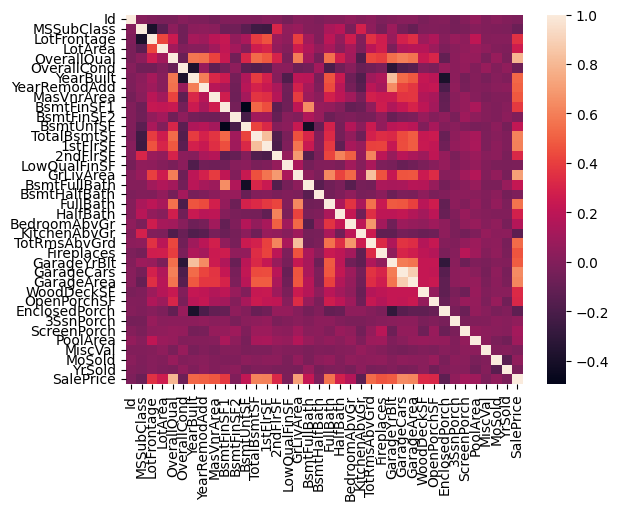

In [29]:
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

<Axes: >

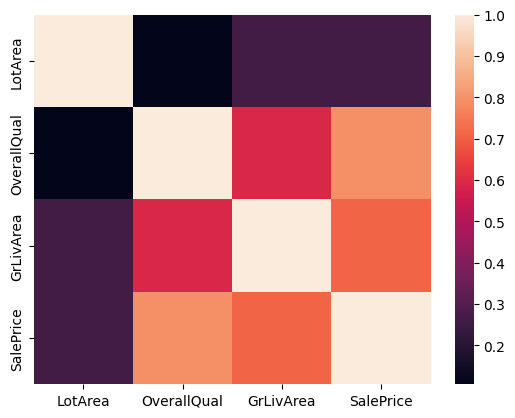

In [38]:
# See how different features correlate to sales price
corr = df[['LotArea', 'OverallQual', 'GrLivArea', 'SalePrice']].corr()
sns.heatmap(corr)

In [41]:
# Determine number of missing values
df.isna().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

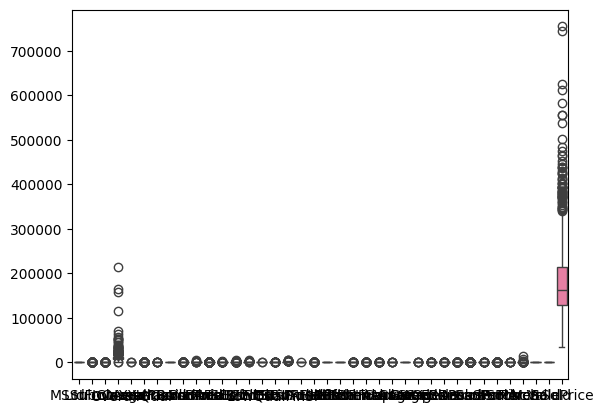

In [42]:
# View the data as a boxplot
sns.boxplot(df.select_dtypes(include='number'))
plt.show()